Following [Total Portfolio Project](https://www.total-portfolio.org/)'s Impact Returns model, in this notebook we analyse the impact-adjusted returns for an investment in [DataPond](https://data-pond.co/) (DP), a seed/pre-seed stage startup working on water quality monitoring.

Previous work: An [impact assesment report](https://docs.google.com/document/d/1AVwksd7_-d-a-bB1a4udAPLJI9XiOvPFieFOI_ZwaRQ/edit), with an accompanying back-of-the-envelope estimates [here](https://drive.google.com/file/d/1f0FmH8aCoTb5Odk9pg-bVOpnYlAjiCam/view?usp=sharing), but with serious methodological issues. 

*Disclaimer - while I try to be objective, the company belongs to my father.*

# Context
## DataPond
* DataPond is an impact startup in the seed funding stage, they have developed a technology to monitor water quality cheaply and scalably. 
* Their primary innovation is the use of cheap ($10s) sensors to algorithmically infer the existence of biological contamination.
* They are planning on working in India, where they have solid connections and expertise, and in concordance with the national Jal Jeevan Mission to deliver piped water to all households. 
  * However, investor preferences and the operational challenges involved in working with the Indian public sector might shift their efforts to the US market.
## The problem
* Water-borne diseases are a huge problem worldwide. 
  * About 2 billion people live without access to safe drinking water.
  * Diarrheal diseases alone are responsible for more than a million deaths each year, a third of which are children under 5.
* Current data collection of water quality is severely lacking
  * Testing for biological contamination directly is complicated and expensive, so it’s used sparingly (even in developing countries).
  * Water treatment and infrastructure operations operate while practically ignorant of water quality status and are thus considerably less effective.
* Dealing with an identified water contamination is relatively simple.
  * Methods such as chlorination and boiling may be used at the household level if alerted to the contamination. 
  * Installing water treatment facilities, navigating people to non-contaminated sources, and treating the upstream contamination source directly might be even more promising.
* Recently, GiveWell [evaluated water-treatment interventions](https://www.givewell.org/international/technical/programs/water-quality-interventions) (such as chlorination tablets), and it seems highly promising. They are focused on interventions that add chlorine to water (say, by installing water dispensers or in-line chlorination), which generally seems not to work well in India due to poor adherence.


# Magnitude

This we evaluate in 3 stages: 
1. Potential Gross Impact (The total future impact of the main successful scenarios)
2. Expected Gross Impact  (Taking the last step, and accounting for probabilities)
3. Enterprise Effectiveness (Taking the last step, and dividing by the total cost)

In [26]:
%pip install squigglepy

Note: you may need to restart the kernel to use updated packages.


## Potential Gross Impact
Our main successful scenario is a global widespread use, and a 100% precision and recall. We also then assume that both locals and water suppliers have perfect understanding of where there are biological contaminations and how severe these are. The whole scenario is unrealistic, so this would be discounted.



Total deaths from water-borne diseases from 2025 up to 2060: 4152781


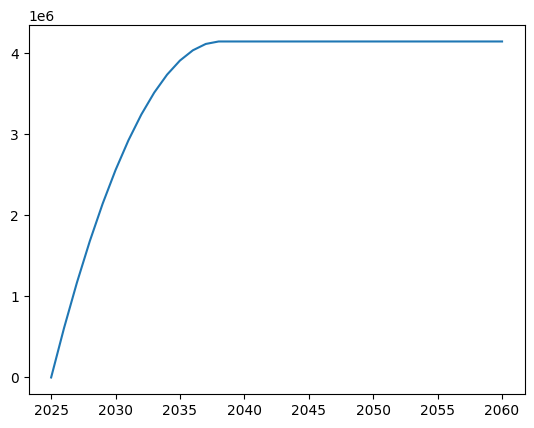

In [3]:
import squigglepy as sq
from matplotlib import pyplot as plt
import numpy as np

# estimate the total problem size from water-borne diseases globaly
# using Our World in Data diarrhoeal disease data (https://ourworldindata.org/diarrheal-diseases)
# we assume that the number of deaths from diarrhoeal diseases is a good proxy for the total number of deaths from water-borne diseases
# we only consider deaths of people under 70 years old
# we assume that yearly deaths continues to decline linearly (even though the decline seems to be mostly of death under 5)
total_yearly_deaths_2019_under_70 = 900_000
total_yearly_deaths_1990_under_70 = 2_300_000
def total_yearly_deaths_under_70(year):
    return max(0, total_yearly_deaths_1990_under_70 + (total_yearly_deaths_2019_under_70 - total_yearly_deaths_1990_under_70) * (year - 1990) / (2019 - 1990))

def discount(year, current_year=2023):
    discount_rate = 0.001 # 0.1% discount rate, accounting for unknown events (as used by CEARCH: https://exploratory-altruism.org/research/#research-methodology)
    return (1 - discount_rate) ** (year - current_year)

def total_deaths_up_to(year, current_year=2023):
    return sum(total_yearly_deaths_under_70(y) * discount(y, current_year) for y in range(current_year, year + 1))

print(f"Total deaths from water-borne diseases from 2025 up to 2060: {total_deaths_up_to(2060, 2025):.0f}")

# plot the total deaths from water-borne diseases from 2025 up to 2060
years = np.arange(2025, 2061)
deaths = [total_yearly_deaths_under_70(year)*discount(year, current_year=2023) for year in years]
total_deaths = [sum(deaths[:i]) for i in range(len(deaths))]
plt.plot(years, total_deaths)


*I don't really expect deaths to continue to decline linearly, unfortunately. So this could be improved, and uncertainty can be modeled in.*

This also leads us to a naive upper-bound on lives saved of about 5 million people.

How would real-time information about the existence of biological contaminations change this? Some proposed mechanisms:
1. Local water suppliers could find and address contaminations. 
2. Infrastructure projects could be prioritized better.
3. Households could choose different water sources (if possible) and use water-treatment that may be available but expensive/impractical for everyday use. 

I don't know which of these are most influential, but the last is easiest to estimate. That could be considered a lower bound on the impact. We have a **very** rough estimate of about one in 25 people saved from water-borne related death (a small but non-neglegible minority of people would actually take action which would actually protect them from sickness). 

We also don't take into account any additional benefits other than preventing deaths (say, QALY gains or increased consumption).

In [4]:
# a conservative rough estimate of 1 in 25 people protected, with high variance.
# Median of about 1/50, 90% CI of about [1/6000, 1/7]. 
death_averted_probability = sq.beta(0.5, 12) 

Total deaths averted from water-borne diseases from 2025 up to 2060: 159983


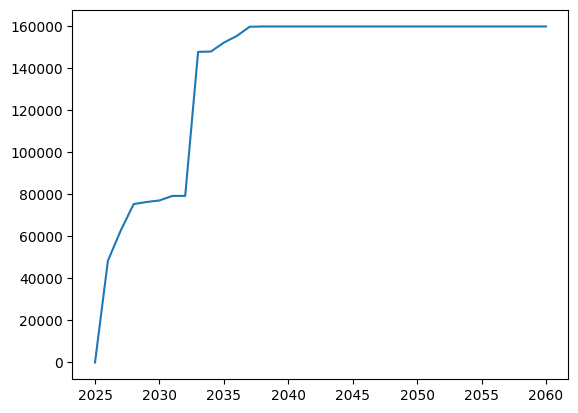

In [12]:
# the effect is linear, so we can just multiply the total deaths by the risk ratio to get the total deaths averted
deaths_averted_yearly = [death * sq.sample(death_averted_probability) for death in deaths] # this isn't accurate, the uncertainty around death_averted_probability is highly correlated between years
print(f"Total deaths averted from water-borne diseases from 2025 up to 2060: {sum(deaths_averted_yearly):.0f}")
total_deaths_averted = [sum(deaths_averted_yearly[:i]) for i in range(len(deaths_averted_yearly))]
plt.plot(years, total_deaths_averted)

*this shouldn't be taken seriously. It's only one possible case and doesn't factor in the probability well.*

In [24]:

total_deaths_averted_2025_to_2060 = sq.sample(sum([death * death_averted_probability for death in deaths]), n = 10_000)

In [23]:
# print mean, 5th percentile, median, and 95th percentile:
print(f"Total deaths averted from water-borne diseases from 2025 up to 2060: \n\tavg - {np.mean(total_deaths_averted_2025_to_2060):.0f} (5% - {np.percentile(total_deaths_averted_2025_to_2060, 5):.0f}, 50% - {np.median(total_deaths_averted_2025_to_2060):.0f}, 95% - {np.percentile(total_deaths_averted_2025_to_2060, 95):.0f})")

Total deaths averted from water-borne diseases from 2025 up to 2060: 
	avg - 165723 (5% - 70852, 50% - 155613, 95% - 294696)


The true uncertainty is much larger than that, but we'll take the mean as our current best estimate. Also, the case where there's 100% coverage is very unlikely, so instead we'll assume something like 50% (which is still HUGE), and so we'll divide the current outcome we got by 2.

**Potential Gross Impact** = 80k lives saved (estimated lower bound)

# Expected Gross Impact


We've already factored in some uncertainty by adding a 0.1% discount rate for uncertain events and the 1/25 protected assumption takes into account that the accuracy isn't perfect. The main risks we consider are:
1. Techological risk - the technology doesn't work as well as expected.
2. Market risk - the market doesn't adopt the technology as much as expected.
3. Operational risk - the company fails to deliver the technology as well as expected.
4. Financial risk - the company fails to raise the necessary funds to deliver the technology as well as expected.

I'm really uncertain about these. 